# Stack

### Data munging (ETL)
In-memory: Pandas, numpy

Disk: pickle

SQL: postgresql, mysql, sqlalchemy, cxOracle

Nosql: Pyspark, mongodb

### Quant
Optimizer: cvxpy

Backtesting: pyfolio (pyalgotrade, zipline)

### Modeling
sklearn

ISLR Python https://github.com/JWarmenhoven/ISLR-python

Statsmodels http://statsmodels.sourceforge.net/

Deep learning https://keras.io/

### Management
IDE http://jupyter.org/ https://www.jetbrains.com/pycharm/

CVS https://git-scm.com/doc

Virtualenv https://virtualenv.pypa.io/en/stable/

### Infrastructure
Windows, Linux ubuntu 

Hadoop

No AWS :(



# Pandas Practical Tips & Tricks

## Loading data and preprocessing

In [1]:
#munging
import pandas as pd
import pandas_datareader.data as web
import datetime

#ide
from IPython import display
%matplotlib inline

#configs
cfg_data_start = datetime.datetime(2016, 1, 4)

cfg_data_end = datetime.datetime(2016, 1, 8)

cfg_tickers = ["GS","MS","GOOG","FB"]

In [2]:
#download data
df_px_raw = web.DataReader(cfg_tickers, 'yahoo', cfg_data_start, cfg_data_end)
df_px_raw

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2016-01-04 00:00:00 to 2016-01-08 00:00:00
Minor_axis axis: FB to MS

In [3]:
#turn into data frame
df_px = df_px_raw.to_frame()
df_px.head()

Open        High         Low       Close      Volume  \
Date       minor                                                               
2016-01-04 FB     101.949997  102.239998   99.750000  102.220001  37912400.0   
           GOOG   743.000000  744.059998  731.257996  741.840027   3272800.0   
           GS     175.789993  177.190002  173.759995  177.139999   3745500.0   
           MS      30.700001   31.520000   30.559999   31.480000  15749200.0   
2016-01-05 FB     102.889999  103.709999  101.669998  102.730003  23258200.0   

                   Adj Close  
Date       minor              
2016-01-04 FB     102.220001  
           GOOG   741.840027  
           GS     174.969431  
           MS      30.911400  
2016-01-05 FB     102.730003

In [4]:
df_px = df_px.reset_index().rename(columns={'minor':'Ticker'})
df_px.head()

,Date,Ticker,Open,High,Low,Close,Volume,Adj Close
0,2016-01-04,FB,101.949997,102.239998,99.750000,102.220001,37912400.0,102.220001
1,2016-01-04,GOOG,743.000000,744.059998,731.257996,741.840027,3272800.0,741.840027
2,2016-01-04,GS,175.789993,177.190002,173.759995,177.139999,3745500.0,174.969431
3,2016-01-04,MS,30.700001,31.520000,30.559999,31.480000,15749200.0,30.911400
4,2016-01-05,FB,102.889999,103.709999,101.669998,102.730003,23258200.0,102.730003


Ticker,FB,GOOG,GS,MS
Date,,,,
2016-01-04,102.220001,741.840027,177.139999,31.480000
2016-01-05,102.730003,742.580017,174.089996,31.280001
2016-01-06,102.970001,743.619995,169.839996,30.500000
2016-01-07,97.919998,726.390015,164.619995,28.980000
2016-01-08,97.330002,714.469971,163.940002,28.379999


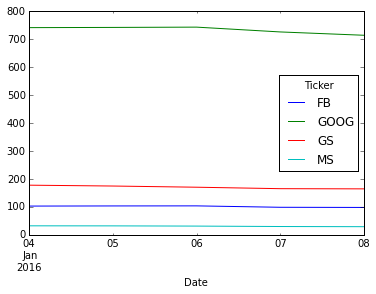

In [25]:
#pivot
display.display_html(df_px.pivot('Date','Ticker','Close').head())
df_px.pivot('Date','Ticker','Close').plot()

## Groupby
* Goal: predict one-day stock return for each ticker
* Todo 1: get one-day stock return for each date

In [12]:
df_px = df_px.ix[:,['Date','Ticker','Close']] 

In [13]:
# run operation by ticker - the wrong way #1
tmp_px_lead = {}

for iTicker in df_px['Ticker'].unique():
    tmp_px = df_px.ix[df_px['Ticker']==iTicker,'Close']
    tmp_px_lead[iTicker]=tmp_px.shift(-1)

print tmp_px_lead

{'GOOG': 1     742.580017
5     743.619995
9     726.390015
13    714.469971
17           NaN
Name: Close, dtype: float64, 'FB': 0     102.730003
4     102.970001
8      97.919998
12     97.330002
16           NaN
Name: Close, dtype: float64, 'GS': 2     174.089996
6     169.839996
10    164.619995
14    163.940002
18           NaN
Name: Close, dtype: float64, 'MS': 3     31.280001
7     30.500000
11    28.980000
15    28.379999
19          NaN
Name: Close, dtype: float64}


In [15]:
# run operation by ticker - the wrong way #2
df_px['Close_lead1']=df_px.sort_values(['Ticker','Date'])['Close'].shift(-1)
df_px

,Date,Ticker,Close,Close_lead1
0,2016-01-04,FB,102.220001,102.730003
1,2016-01-04,GOOG,741.840027,742.580017
2,2016-01-04,GS,177.139999,174.089996
3,2016-01-04,MS,31.480000,31.280001
4,2016-01-05,FB,102.730003,102.970001
5,2016-01-05,GOOG,742.580017,743.619995
6,2016-01-05,GS,174.089996,169.839996
7,2016-01-05,MS,31.280001,30.500000
8,2016-01-06,FB,102.970001,97.919998
9,2016-01-06,GOOG,743.619995,726.390015


In [17]:
# run operation by ticker - the right way
df_px['Close_lead1']=df_px.groupby('Ticker')['Close'].transform(lambda x: x.shift(-1))
df_px

,Date,Ticker,Close,Close_lead1
0,2016-01-04,FB,102.220001,102.730003
1,2016-01-04,GOOG,741.840027,742.580017
2,2016-01-04,GS,177.139999,174.089996
3,2016-01-04,MS,31.480000,31.280001
4,2016-01-05,FB,102.730003,102.970001
5,2016-01-05,GOOG,742.580017,743.619995
6,2016-01-05,GS,174.089996,169.839996
7,2016-01-05,MS,31.280001,30.500000
8,2016-01-06,FB,102.970001,97.919998
9,2016-01-06,GOOG,743.619995,726.390015


Technique even has a name: split-apply-combine
http://pandas.pydata.org/pandas-docs/stable/groupby.html

Other use cases:
* Run for every month

Downsides:
* No parallel computing support (try http://dask.pydata.org/en/latest/)
* First group runs twice

## More complicated functions that require multiple columns - use apply
## Also: rolling stats

In [21]:
def apply_stats(df):
    #input df = data frame with data filtered for group
    
    df['Close_lead1'] = df['Close'].shift(-1)
    df['Close_zscore1'] = df['Close'].rolling(window=2).mean()
    
    return df

df_px.groupby('Ticker').apply(apply_stats)

,Date,Ticker,Close,Close_lead1,Close_zscore1
0,2016-01-04,FB,102.220001,102.730003,NaN
1,2016-01-04,GOOG,741.840027,742.580017,NaN
2,2016-01-04,GS,177.139999,174.089996,NaN
3,2016-01-04,MS,31.480000,31.280001,NaN
4,2016-01-05,FB,102.730003,102.970001,102.475002
5,2016-01-05,GOOG,742.580017,743.619995,742.210022
6,2016-01-05,GS,174.089996,169.839996,175.614997
7,2016-01-05,MS,31.280001,30.500000,31.380001
8,2016-01-06,FB,102.970001,97.919998,102.850002
9,2016-01-06,GOOG,743.619995,726.390015,743.100006


### Rolling gotcha
Doesn't work on data frames, only series
http://stackoverflow.com/questions/19121854/using-rolling-apply-on-a-dataframe-object

## Lookup data with merge

In [6]:
df_industries = pd.DataFrame({'Ticker':["GS","MS","GOOG","FB"], 'Industry':["Finance","Finance","Tech","Tech"]})
df_industries

,Industry,Ticker
0,Finance,GS
1,Finance,MS
2,Tech,GOOG
3,Tech,FB


In [18]:
df_model = df_px.merge(df_industries, on=['Ticker'])
df_model

,Date,Ticker,Close,Close_lead1,Industry
0,2016-01-04,FB,102.220001,102.730003,Tech
1,2016-01-05,FB,102.730003,102.970001,Tech
2,2016-01-06,FB,102.970001,97.919998,Tech
3,2016-01-07,FB,97.919998,97.330002,Tech
4,2016-01-08,FB,97.330002,NaN,Tech
5,2016-01-04,GOOG,741.840027,742.580017,Tech
6,2016-01-05,GOOG,742.580017,743.619995,Tech
7,2016-01-06,GOOG,743.619995,726.390015,Tech
8,2016-01-07,GOOG,726.390015,714.469971,Tech
9,2016-01-08,GOOG,714.469971,NaN,Tech


# The dark side of the force...
* look-ahead bias 1: shift(-1) vs shift(1)
* look-ahead bias 2: preprocessing (eg PCA) on full dataset vs what available at the time
* look-ahead bias 3: restated data and financials
* look-ahead bias 4: survivorship bias
* overfitting 1: 